# checking for equivalence

## I ran one segment of 201905 - I called it RIVTA because it should output both river carbon and all TA metrics. 




This test run
    - includes the asselin filter correction and should be run with the smelt_201905_equiv namelist
    - includes code to calculate biological rates.
    - full notes in https://docs.google.com/document/d/1QnDxmC-5pgjy449gdqaR4TF0BKLVlWY_0bIkuMQebEQ/edit
    - includes output for prd_dic, prd_ta, rem_dic, rem_ta, unc_dic 
    - /data/tjarniko/results/FUTURE_runs/BUDGET/01jan17_RIVTA
    

1. Objective: We want this run to be the same as the 201905 hindcast, so that we can meaningfully compare them. 

2. Objective: We also want to output remineralization rates. these should be in mmol/s per grid cell
    we can convert to mmol/day and add all the days and get an idea of where sinks and sources are happening in the model. if we do it right. 

    - is this test run the same as the hindcast run?
    
    - what do the prd and remineralization profiles look like?
    
  
    
    
   
    

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
# import xarray as xr
import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
# from scipy.io import loadmat
from cmocean import cm
import pandas as pd
import warnings
import pickle
import arrow
#from cartopy import crs, feature
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools
import netCDF4 as nc
import glob

#import LambertConformalTicks as lct

%matplotlib inline
plt.rcParams['font.size'] = 11
warnings.simplefilter('ignore')

### Part 1, Are the two runs the same - do simple plots at 0, 20m, and domain-wide mean depth profiles that move with time - yes, they are, great. 

In [3]:
hinddir = '/results2/SalishSea/nowcast-green.201905/02jan17/'

hindcarp = 'SalishSea_1d_*_carp_T.nc'
w = glob.glob(hinddir+hindcarp)
hindcarp_nc = nc.Dataset(w[0])

hindgrid = 'SalishSea_1d_*_grid_T.nc'
w = glob.glob(hinddir+hindgrid)
hindgrid_nc = nc.Dataset(w[0])

testdir = '/data/tjarniko/results/FUTURE_runs/BUDGET/01jan17_RIVTA/'
testcarp = 'SalishSeaCast_1d_*_carp_T*20170102.nc'
w = glob.glob(testdir+testcarp)
testcarp_nc = nc.Dataset(w[0])

testgrid = 'SalishSeaCast_1d_*_grid_T*20170102.nc'
w = glob.glob(testdir+testgrid)
testgrid_nc = nc.Dataset(w[0])


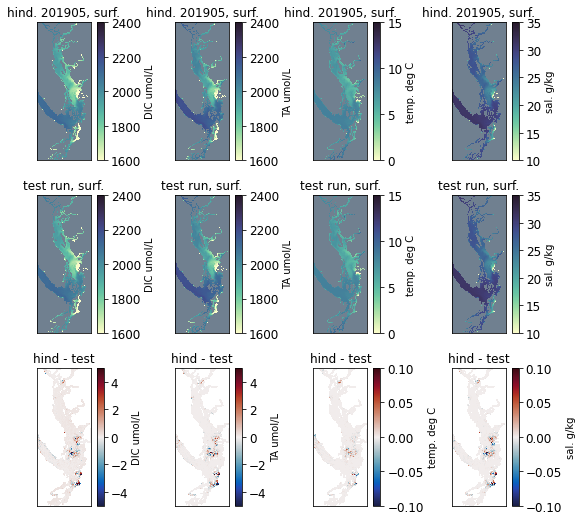

In [4]:
fact = 0.7
fig = plt.figure(figsize=(12*fact,10.5*fact))

to_plot_hind = [hindcarp_nc['dissolved_inorganic_carbon'][0,0,:,:],\
           hindcarp_nc['total_alkalinity'][0,0,:,:],\
           hindgrid_nc['votemper'][0,0,:,:],\
           hindgrid_nc['vosaline'][0,0,:,:]]

to_plot_test = [testcarp_nc['dissolved_inorganic_carbon'][0,0,:,:],\
           testcarp_nc['total_alkalinity'][0,0,:,:],\
           testgrid_nc['votemper'][0,0,:,:],\
           testgrid_nc['vosaline'][0,0,:,:]]

tmin = [1600,1600,0,10]
tmax = [2400,2400,15,35]
clabel = ['DIC umol/L','TA umol/L', 'temp. deg C', 'sal. g/kg']
tit = 'hind. 201905, surf.'

for i in range(1,5):

    ax1 = fig.add_subplot(3,4,i)
    viz_tools.set_aspect(ax1)
    
    cmap = cm.deep
    t_plt = to_plot_hind[i-1]
    tplt = np.ma.masked_values(t_plt,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.deep, vmin=tmin[i-1], vmax=tmax[i-1])
    cmap.set_bad('slategray')
    #ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(clabel[i-1])
    ax1.set_title(tit)
    
tit = 'test run, surf.'

for i in range(5,9):

    ax1 = fig.add_subplot(3,4,i)
    viz_tools.set_aspect(ax1)
    
    cmap = cm.deep
    t_plt = to_plot_test[i-5]
    tplt = np.ma.masked_values(t_plt,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.deep, vmin=tmin[i-5], vmax=tmax[i-5])
    cmap.set_bad('slategray')
    #ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(clabel[i-5])
    ax1.set_title(tit)

plt.tight_layout()

## 
tit = 'hind - test'
tmin = [-5,-5,-0.1,-0.1]
tmax = [5,5,0.1,0.1]
for i in range(9,13):

    ax1 = fig.add_subplot(3,4,i)
    viz_tools.set_aspect(ax1)
    t_plt = to_plot_hind[i-9] - to_plot_test[i-9]
    tplt = np.ma.masked_values(t_plt,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.balance, vmin=tmin[i-9], vmax=tmax[i-9])
    cmap.set_bad('slategray')
    #ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(clabel[i-9])
    ax1.set_title(tit)

plt.tight_layout()

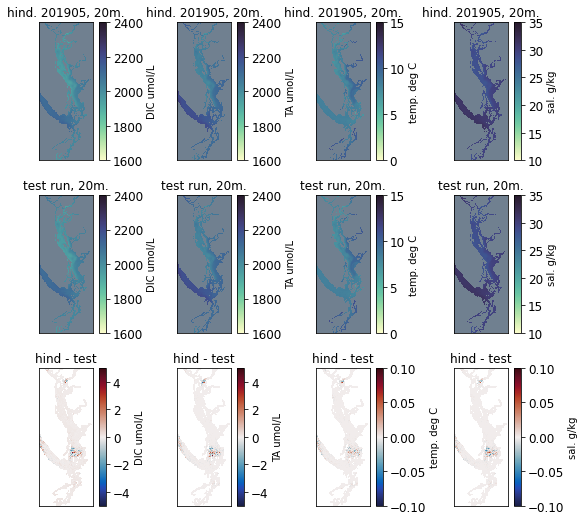

In [5]:
fig = plt.figure(figsize=(12*fact,10.5*fact))

to_plot_hind = [hindcarp_nc['dissolved_inorganic_carbon'][0,20,:,:],\
           hindcarp_nc['total_alkalinity'][0,20,:,:],\
           hindgrid_nc['votemper'][0,20,:,:],\
           hindgrid_nc['vosaline'][0,20,:,:]]

to_plot_test = [testcarp_nc['dissolved_inorganic_carbon'][0,20,:,:],\
           testcarp_nc['total_alkalinity'][0,20,:,:],\
           testgrid_nc['votemper'][0,20,:,:],\
           testgrid_nc['vosaline'][0,20,:,:]]

tmin = [1600,1600,0,10]
tmax = [2400,2400,15,35]
clabel = ['DIC umol/L','TA umol/L', 'temp. deg C', 'sal. g/kg']
tit = 'hind. 201905, 20m.'

for i in range(1,5):

    ax1 = fig.add_subplot(3,4,i)
    viz_tools.set_aspect(ax1)
    
    cmap = cm.deep
    t_plt = to_plot_hind[i-1]
    tplt = np.ma.masked_values(t_plt,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.deep, vmin=tmin[i-1], vmax=tmax[i-1])
    cmap.set_bad('slategray')
    #ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(clabel[i-1])
    ax1.set_title(tit)
    
tit = 'test run, 20m.'

for i in range(5,9):

    ax1 = fig.add_subplot(3,4,i)
    viz_tools.set_aspect(ax1)
    
    cmap = cm.deep
    t_plt = to_plot_test[i-5]
    tplt = np.ma.masked_values(t_plt,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.deep, vmin=tmin[i-5], vmax=tmax[i-5])
    cmap.set_bad('slategray')
    #ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(clabel[i-5])
    ax1.set_title(tit)

plt.tight_layout()

## 
tit = 'hind - test'
tmin = [-5,-5,-0.1,-0.1]
tmax = [5,5,0.1,0.1]
for i in range(9,13):

    ax1 = fig.add_subplot(3,4,i)
    viz_tools.set_aspect(ax1)
    t_plt = to_plot_hind[i-9] - to_plot_test[i-9]
    tplt = np.ma.masked_values(t_plt,0)
    mesh = ax1.pcolormesh(tplt, cmap=cm.balance, vmin=tmin[i-9], vmax=tmax[i-9])
    cmap.set_bad('slategray')
    #ax1.set_title(mon, fontsize = 30)
    plt.xticks([])
    plt.yticks([])
    
    cbar = plt.colorbar(mesh)
    cbar.ax.tick_params(labelsize=12)
    cbar.set_label(clabel[i-9])
    ax1.set_title(tit)

plt.tight_layout()

### by-layer sums

In [6]:
to_plot_hind = [hindcarp_nc['dissolved_inorganic_carbon'][0,:,:,:],\
           hindcarp_nc['total_alkalinity'][0,:,:,:],\
           hindgrid_nc['votemper'][0,:,:,:],\
           hindgrid_nc['vosaline'][0,:,:,:]]

to_plot_test = [testcarp_nc['dissolved_inorganic_carbon'][0,:,:,:],\
           testcarp_nc['total_alkalinity'][0,:,:,:],\
           testgrid_nc['votemper'][0,:,:,:],\
           testgrid_nc['vosaline'][0,:,:,:]]


In [7]:
hindcarp_DIC = hindcarp_nc['dissolved_inorganic_carbon'][0,:,:,:]
hindcarp_TA = hindcarp_nc['total_alkalinity'][0,:,:,:]
hindgrid_temp = hindgrid_nc['votemper'][0,:,:,:]
hindgrid_sal = hindgrid_nc['vosaline'][0,:,:,:]

testcarp_DIC = testcarp_nc['dissolved_inorganic_carbon'][0,:,:,:]
testcarp_TA = testcarp_nc['total_alkalinity'][0,:,:,:]
testgrid_temp = testgrid_nc['votemper'][0,:,:,:]
testgrid_sal = testgrid_nc['vosaline'][0,:,:,:]

hindcarp_DIC[hindcarp_DIC == 0 ] = np.nan
hindcarp_TA[hindcarp_TA == 0 ] = np.nan
hindgrid_temp[hindgrid_temp == 0 ] = np.nan
hindgrid_sal[hindgrid_sal == 0 ] = np.nan

testcarp_DIC[testcarp_DIC == 0 ] = np.nan
testcarp_TA[testcarp_TA == 0 ] = np.nan
testgrid_temp[testgrid_temp == 0 ] = np.nan
testgrid_sal[testgrid_sal == 0 ] = np.nan

In [8]:
hindcarp_DIC_p = np.nanmean(np.nanmean(hindcarp_DIC, axis = 2),axis =1)
hindcarp_TA_p = np.nanmean(np.nanmean(hindcarp_TA, axis = 2),axis =1)
hindgrid_temp_p = np.nanmean(np.nanmean(hindgrid_temp, axis = 2),axis =1)
hindgrid_sal_p = np.nanmean(np.nanmean(hindgrid_sal, axis = 2),axis =1)

testcarp_DIC_p = np.nanmean(np.nanmean(testcarp_DIC, axis = 2),axis =1)
testcarp_TA_p = np.nanmean(np.nanmean(testcarp_TA, axis = 2),axis =1)
testgrid_temp_p = np.nanmean(np.nanmean(testgrid_temp, axis = 2),axis =1)
testgrid_sal_p = np.nanmean(np.nanmean(testgrid_sal, axis = 2),axis =1)

In [9]:
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

Text(0.5, 0.98, 'domain-wide means of 1-day avg at 02jan17, Red: hindcast, black: testrun \n (yaxis units (m) , x-axis as expected)')

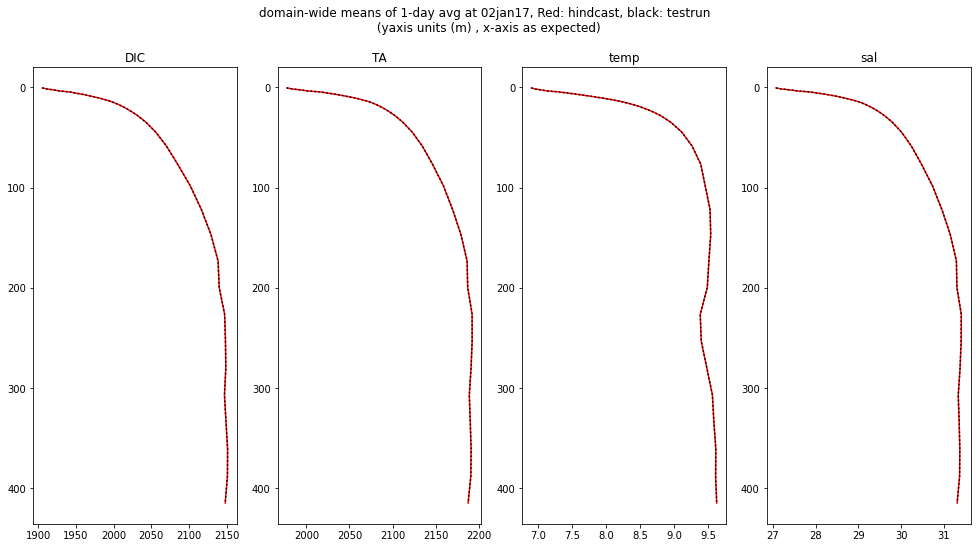

In [10]:
## plotting
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
td = (w['gdept_1d'][0,:])
fact = 0.6

fig, axs = plt.subplots(1,4, figsize=(28*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(hindcarp_DIC_p,td, color = 'r',linestyle = '-')
axs[0].plot(testcarp_DIC_p,td, color = 'k',linestyle = ':')
axs[0].invert_yaxis(); axs[0].set_title('DIC')

axs[1].plot(hindcarp_TA_p,td, color = 'r',linestyle = '-')
axs[1].plot(testcarp_TA_p,td, color = 'k',linestyle = ':')
axs[1].invert_yaxis(); axs[1].set_title('TA')

axs[2].plot(hindgrid_temp_p,td, color = 'r',linestyle = '-')
axs[2].plot(testgrid_temp_p,td, color = 'k',linestyle = ':')
axs[2].invert_yaxis(); axs[2].set_title('temp')

axs[3].plot(hindgrid_sal_p,td, color = 'r',linestyle = '-')
axs[3].plot(testgrid_sal_p,td, color = 'k',linestyle = ':')
axs[3].invert_yaxis(); axs[3].set_title('sal')

plt.suptitle('domain-wide means of 1-day avg at 02jan17, Red: hindcast, black: testrun \n (yaxis units (m) , x-axis as expected)')

Text(0.5, 0.98, '% difference in mean quantity between hind and test, \n (yaxis units (m) , x-axis % of quantity (ie ((hind-test)/hind) * 100)')

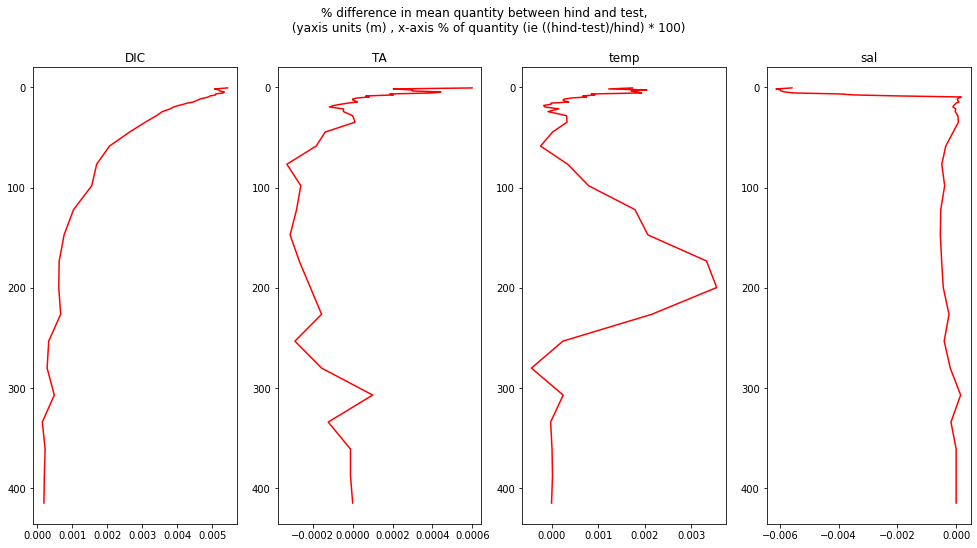

In [11]:
## plotting
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
td = (w['gdept_1d'][0,:])
fact = 0.6

fig, axs = plt.subplots(1,4, figsize=(28*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].plot(((hindcarp_DIC_p-testcarp_DIC_p)/hindcarp_DIC_p)*100 ,td, color = 'r',linestyle = '-')
axs[0].invert_yaxis(); axs[0].set_title('DIC')

axs[1].plot(((hindcarp_TA_p-testcarp_TA_p)/hindcarp_TA_p)*100 ,td, color = 'r',linestyle = '-')
axs[1].invert_yaxis(); axs[1].set_title('TA')

axs[2].plot(((hindgrid_temp_p-testgrid_temp_p)/hindgrid_temp_p)*100 ,td, color = 'r',linestyle = '-')
#axs[2].plot(testgrid_temp_p,td, color = 'k',linestyle = ':')
axs[2].invert_yaxis(); axs[2].set_title('temp')

axs[3].plot(((hindgrid_sal_p-testgrid_sal_p)/hindgrid_sal_p)*100 ,td, color = 'r',linestyle = '-')

axs[3].invert_yaxis(); axs[3].set_title('sal')

plt.suptitle('% difference in mean quantity between hind and test, \n (yaxis units (m) , x-axis % of quantity (ie ((hind-test)/hind) * 100)')

## do this for the whole available timeseries (first 2 segment, day 0-60)


In [12]:
# ## extract data

# start ='2017-01-01'
# end ='2017-01-30'

# start_run = arrow.get(start)
# end_run = arrow.get(end)

# arrow_array = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array.append(r)

# dayslen = len(arrow_array)

# RIVTA_DIC = np.zeros([dayslen,40,898,398])
# RIVTA_CO2 = np.zeros([dayslen,898,398])

# RIVTA_NIT = np.zeros([dayslen,40,898,398])
# RIVTA_DIAT = np.zeros([dayslen,40,898,398])

# RIVTA_TEMP = np.zeros([dayslen,40,898,398])
# RIVTA_SAL = np.zeros([dayslen,40,898,398])


# for i in range(0,dayslen):

#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     #if i%10 == 0:
#     print(ymd)
    
#     findfil_carp = f'/data/tjarniko/results/FUTURE_runs/BUDGET/*/SalishSeaCast_1d_*carp*{ymd}.nc'
#     foundfil_carp = glob.glob(findfil_carp)
#     fcarp = nc.Dataset(foundfil_carp[0])
    
#     RIVTA_DIC[i,:,:,:] = fcarp['dissolved_inorganic_carbon'][0,:,:,:]
#     RIVTA_CO2[i,:,:] = fcarp['co2_flux_mmol_m2_s'][0,:,:]
    
#     findfil_ptrc = f'/data/tjarniko/results/FUTURE_runs/BUDGET/*/SalishSeaCast_1d_*ptrc*{ymd}.nc'
#     foundfil_ptrc = glob.glob(findfil_ptrc)
#     fptrc = nc.Dataset(foundfil_ptrc[0])
    
#     RIVTA_NIT[i,:,:,:] = fptrc['nitrate'][0,:,:,:]
#     RIVTA_DIAT[i,:,:,:] = fptrc['diatoms'][0,:,:,:]
    
#     findfil_grid_T = f'/data/tjarniko/results/FUTURE_runs/BUDGET/*/SalishSeaCast_1d_*grid_T*{ymd}.nc'
#     foundfil_grid_T = glob.glob(findfil_grid_T)
#     fgrid_T = nc.Dataset(foundfil_grid_T[0])
    
#     RIVTA_TEMP[i,:,:,:] = fgrid_T['votemper'][0,:,:,:]
#     RIVTA_SAL[i,:,:,:] = fgrid_T['vosaline'][0,:,:,:]
    
# pickle.dump(RIVTA_TEMP, open("./pkls/RIVTA_TEMP.pkl", 'wb'))
# pickle.dump(RIVTA_SAL, open("./pkls/RIVTA_SAL.pkl", 'wb'))
# pickle.dump(RIVTA_DIAT, open("./pkls/RIVTA_DIAT.pkl", 'wb'))
# pickle.dump(RIVTA_NIT, open("./pkls/RIVTA_NIT.pkl", 'wb'))
# pickle.dump(RIVTA_DIC, open("./pkls/RIVTA_DIC.pkl", 'wb'))
# pickle.dump(RIVTA_CO2, open("./pkls/RIVTA_CO2.pkl", 'wb'))


20170101
20170102
20170103
20170104
20170105
20170106
20170107
20170108
20170109
20170110
20170111
20170112
20170113
20170114
20170115
20170116
20170117
20170118
20170119
20170120
20170121
20170122
20170123
20170124
20170125
20170126
20170127


KeyboardInterrupt: 

In [ ]:
# ## extract data

# HIND_DIC = np.zeros([dayslen,40,898,398])
# #HIND_CO2 = np.zeros([dayslen,898,398])

# HIND_NIT = np.zeros([dayslen,40,898,398])
# HIND_DIAT = np.zeros([dayslen,40,898,398])

# HIND_TEMP = np.zeros([dayslen,40,898,398])
# HIND_SAL = np.zeros([dayslen,40,898,398])


# for i in range(0,dayslen):

#     tdate = arrow_array[i][0]
#     ymd = tdate.format('YYYYMMDD')

#     #if i%10 == 0:
#     print(ymd)
    
#     findfil_carp = f'/results2/SalishSea/nowcast-green.201905/*/SalishSea_1d_{ymd}*carp*.nc'
#     foundfil_carp = glob.glob(findfil_carp)
#     fcarp = nc.Dataset(foundfil_carp[0])
    
#     HIND_DIC[i,:,:,:] = fcarp['dissolved_inorganic_carbon'][0,:,:,:]
#     #HIND_CO2[i,:,:] = fcarp['co2_flux_mmol_m2_s'][0,:,:]
    
#     findfil_ptrc = f'/results2/SalishSea/nowcast-green.201905/*/SalishSea_1d_{ymd}*ptrc*.nc'
#     foundfil_ptrc = glob.glob(findfil_ptrc)
#     fptrc = nc.Dataset(foundfil_ptrc[0])
    
#     HIND_NIT[i,:,:,:] = fptrc['nitrate'][0,:,:,:]
#     HIND_DIAT[i,:,:,:] = fptrc['diatoms'][0,:,:,:]
    
#     findfil_grid_T = f'/results2/SalishSea/nowcast-green.201905/*/SalishSea_1d_{ymd}*grid_T*.nc'
#     foundfil_grid_T = glob.glob(findfil_grid_T)
#     fgrid_T = nc.Dataset(foundfil_grid_T[0])
    
#     HIND_TEMP[i,:,:,:] = fgrid_T['votemper'][0,:,:,:]
#     HIND_SAL[i,:,:,:] = fgrid_T['vosaline'][0,:,:,:]
    
# pickle.dump(HIND_TEMP, open("./pkls/HIND_TEMP.pkl", 'wb'))
# pickle.dump(HIND_SAL, open("./pkls/HIND_SAL.pkl", 'wb'))
# pickle.dump(HIND_DIAT, open("./pkls/HIND_DIAT.pkl", 'wb'))
# pickle.dump(HIND_NIT, open("./pkls/HIND_NIT.pkl", 'wb'))
# pickle.dump(HIND_DIC, open("./pkls/HIND_DIC.pkl", 'wb'))
# # pickle.dump(HIND_CO2, open("./pkls/HIND_CO2.pkl", 'wb'))


In [ ]:
# RIVTA_TEMP = pickle.load(open('./pkls/RIVTA_TEMP.pkl', 'rb'))
# RIVTA_SAL = pickle.load(open('./pkls/RIVTA_SAL.pkl', 'rb'))
# RIVTA_DIC = pickle.load(open('./pkls/RIVTA_DIC.pkl', 'rb'))
# RIVTA_NIT = pickle.load(open('./pkls/RIVTA_NIT.pkl', 'rb'))
# RIVTA_DIAT = pickle.load(open('./pkls/RIVTA_DIAT.pkl', 'rb'))
# RIVTA_CO2 = pickle.load(open('./pkls/RIVTA_CO2.pkl', 'rb'))

# w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# tmask = (w['tmask'])

# tmask_broad = np.zeros_like(RIVTA_DIAT)

# for i in range(0,dayslen):
#     tmask_broad[i,:,:] = tmask[0,:,:]

# RIVTA_TEMP[tmask_broad == 0 ] = np.nan
# RIVTA_SAL[tmask_broad == 0 ] = np.nan
# RIVTA_DIC[tmask_broad == 0 ] = np.nan
# RIVTA_NIT[tmask_broad == 0 ] = np.nan
# RIVTA_DIAT[tmask_broad == 0 ] = np.nan
# #RIVTA_CO2[RIVTA_CO2 == 0 ] = np.nan

# RIVTA_TEMP_p = np.nanmean(np.nanmean(RIVTA_TEMP, axis = 2),axis =2)
# RIVTA_SAL_p = np.nanmean(np.nanmean(RIVTA_SAL, axis = 2),axis =2)
# RIVTA_DIC_p = np.nanmean(np.nanmean(RIVTA_DIC, axis = 2),axis =2)
# RIVTA_NIT_p = np.nanmean(np.nanmean(RIVTA_NIT, axis = 2),axis =2)
# RIVTA_DIAT_p = np.nanmean(np.nanmean(RIVTA_DIAT, axis = 2),axis =2)
# #RIVTA_CO2_p = np.nanmean(np.nanmean(RIVTA_CO2, axis = 2),axis =2)

# pickle.dump(RIVTA_TEMP_p, open("./pkls/RIVTA_TEMP_p.pkl", 'wb'))
# pickle.dump(RIVTA_SAL_p, open("./pkls/RIVTA_SAL_p.pkl", 'wb'))
# pickle.dump(RIVTA_DIAT_p, open("./pkls/RIVTA_DIAT_p.pkl", 'wb'))
# pickle.dump(RIVTA_NIT_p, open("./pkls/RIVTA_NIT_p.pkl", 'wb'))
# pickle.dump(RIVTA_DIC_p, open("./pkls/RIVTA_DIC_p.pkl", 'wb'))
# #pickle.dump(RIVTA_CO2_p, open("./pkls/RIVTA_CO2_p.pkl", 'wb'))


In [ ]:
# HIND_TEMP = pickle.load(open('./pkls/HIND_TEMP.pkl', 'rb'))
# HIND_SAL = pickle.load(open('./pkls/HIND_SAL.pkl', 'rb'))
# HIND_DIC = pickle.load(open('./pkls/HIND_DIC.pkl', 'rb'))
# HIND_NIT = pickle.load(open('./pkls/HIND_NIT.pkl', 'rb'))
# HIND_DIAT = pickle.load(open('./pkls/HIND_DIAT.pkl', 'rb'))
# #HIND_CO2 = pickle.load(open('./pkls/HIND_CO2.pkl', 'rb'))

# w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
# tmask = (w['tmask'])

# tmask_broad = np.zeros_like(HIND_DIAT)

# for i in range(0,dayslen):
#     tmask_broad[i,:,:] = tmask[0,:,:]

# HIND_TEMP[tmask_broad == 0 ] = np.nan
# HIND_SAL[tmask_broad == 0 ] = np.nan
# HIND_DIC[tmask_broad == 0 ] = np.nan
# HIND_NIT[tmask_broad == 0 ] = np.nan
# HIND_DIAT[tmask_broad == 0 ] = np.nan
# #HIND_CO2[HIND_CO2 == 0 ] = np.nan

# HIND_TEMP_p = np.nanmean(np.nanmean(HIND_TEMP, axis = 2),axis =2)
# HIND_SAL_p = np.nanmean(np.nanmean(HIND_SAL, axis = 2),axis =2)
# HIND_DIC_p = np.nanmean(np.nanmean(HIND_DIC, axis = 2),axis =2)
# HIND_NIT_p = np.nanmean(np.nanmean(HIND_NIT, axis = 2),axis =2)
# HIND_DIAT_p = np.nanmean(np.nanmean(HIND_DIAT, axis = 2),axis =2)
# #HIND_CO2_p = np.nanmean(np.nanmean(HIND_CO2, axis = 2),axis =2)

# pickle.dump(HIND_TEMP_p, open("./pkls/HIND_TEMP_p.pkl", 'wb'))
# pickle.dump(HIND_SAL_p, open("./pkls/HIND_SAL_p.pkl", 'wb'))
# pickle.dump(HIND_DIAT_p, open("./pkls/HIND_DIAT_p.pkl", 'wb'))
# pickle.dump(HIND_NIT_p, open("./pkls/HIND_NIT_p.pkl", 'wb'))
# pickle.dump(HIND_DIC_p, open("./pkls/HIND_DIC_p.pkl", 'wb'))
# #pickle.dump(HIND_CO2_p, open("./pkls/HIND_CO2_p.pkl", 'wb'))


In [13]:
HIND_TEMP_p =  pickle.load(open('./pkls/HIND_TEMP_p.pkl', 'rb'))
HIND_SAL_p =  pickle.load(open('./pkls/HIND_SAL_p.pkl', 'rb'))
HIND_DIC_p =  pickle.load(open('./pkls/HIND_DIC_p.pkl', 'rb'))
HIND_NIT_p =  pickle.load(open('./pkls/HIND_NIT_p.pkl', 'rb'))
HIND_DIAT_p =  pickle.load(open('./pkls/HIND_DIAT_p.pkl', 'rb'))

RIVTA_TEMP_p =  pickle.load(open('./pkls/RIVTA_TEMP_p.pkl', 'rb'))
RIVTA_SAL_p =  pickle.load(open('./pkls/RIVTA_SAL_p.pkl', 'rb'))
RIVTA_DIC_p =  pickle.load(open('./pkls/RIVTA_DIC_p.pkl', 'rb'))
RIVTA_NIT_p =  pickle.load(open('./pkls/RIVTA_NIT_p.pkl', 'rb'))
RIVTA_DIAT_p =  pickle.load(open('./pkls/RIVTA_DIAT_p.pkl', 'rb'))

## what sort of differences in by-layer quantities do we see between the two runs?

## and do they change with time?

In [14]:
def plot_quant(quantity_p,no,quantname):
    for i in range(0,dayslen):
            axs[no].plot(quantity_p[i,:],td,color = tcm(1.*(i+shift)/seg), linewidth = 1)
    for i in range(0,dayslen):
        if i%intvl == 0:
            axs[no].plot(quantity_p[i,:],td,\
                        color = tcm(1.*(i+shift)/seg), linewidth = 2.2, label = f'day {i}')
    axs[no].invert_yaxis(); axs[no].set_title(quantname)
    axs[no].legend()
    
def plot_quant_diff(quantity_p,quantity2_p,no,quantname):
    for i in range(0,dayslen):
            axs[no].plot(quantity_p[i,:]-quantity2_p[i,:],td,color = tcm(1.*(i+shift)/seg), linewidth = 1)
    for i in range(0,dayslen):
        if i%intvl == 0:
            axs[no].plot(quantity_p[i,:]-quantity2_p[i,:],td,\
                        color = tcm(1.*(i+shift)/seg), linewidth = 2.2, label = f'day {i}')
    axs[no].invert_yaxis(); axs[no].set_title(quantname)
    axs[no].legend()

Text(0.5, 0.98, 'domain average quantities and difference in mean quantity between hind and test \n (y axis is m, x axis is standard model units for quantity.)')

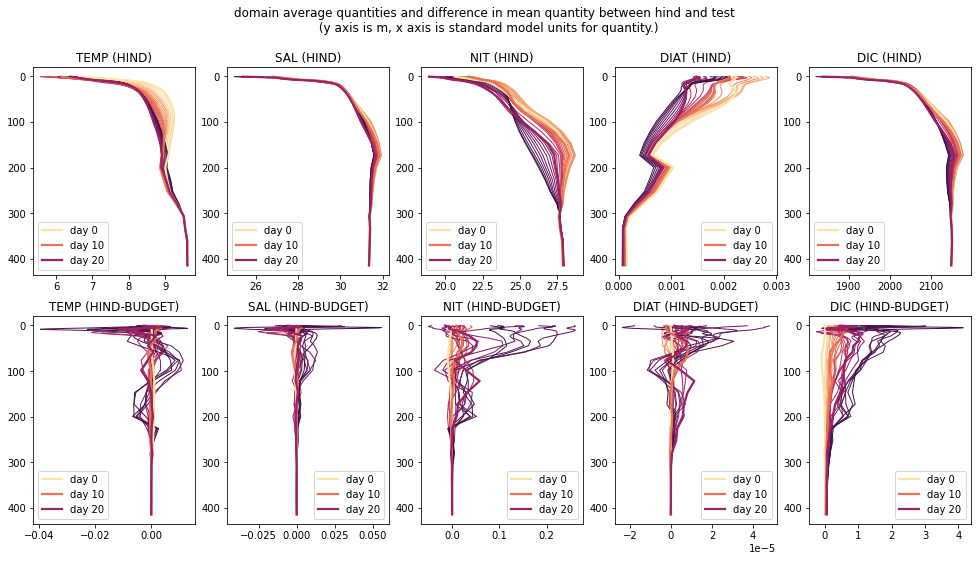

In [16]:
## plotting
w = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
td = (w['gdept_1d'][0,:])
fact = 0.6

tcm = cm.matter
shift = 1
seg = 31
intvl = 10
dayslen = 30

fig, axs = plt.subplots(2,5, figsize=(28*fact, 14*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

plot_quant(HIND_TEMP_p,0,'TEMP (HIND)')
plot_quant(HIND_SAL_p,1,'SAL (HIND)')
plot_quant(HIND_NIT_p,2,'NIT (HIND)')
plot_quant(HIND_DIAT_p,3,'DIAT (HIND)')
plot_quant(HIND_DIC_p,4,'DIC (HIND)')

plot_quant_diff(HIND_TEMP_p,RIVTA_TEMP_p,5,'TEMP (HIND-BUDGET)')
plot_quant_diff(HIND_SAL_p,RIVTA_SAL_p,6,'SAL (HIND-BUDGET)')
plot_quant_diff(HIND_NIT_p,RIVTA_NIT_p,7,'NIT (HIND-BUDGET)')
plot_quant_diff(HIND_DIAT_p,RIVTA_DIAT_p,8,'DIAT (HIND-BUDGET)')
plot_quant_diff(HIND_DIC_p,RIVTA_DIC_p,9,'DIC (HIND-BUDGET)')



plt.suptitle('domain average quantities and difference in mean quantity between hind and test \n (y axis is m, x axis is standard model units for quantity.)')

# Notes: 

- obvious but: set output to nan where landmask, not where == 0. 
- no blowups, but a small drift in the nitrate, diatoms, dic (expected to go away after 60 days)

## Part 2: Start budgeting!!

### Part 2: What sort of metrics are coming out, do they make sense, do I understand the units, and what does the budget look like?

Governing equations of the system (as written in MM16):

$\frac{\partial DIC}{\partial t } = - (U_{N} + U_{PC} - Rm_{N}) * R_{C:N} + {physical transport} + {airsea flux} $ 

$\frac{\partial TA}{\partial t } = U_{NO3-} - 2Rm_{NO3-} - U_{NH4+} + Rm_{NH4+} + (U_{PO4} + Rm_{PO4})* R_{N:P} + {physical transport}$ 


The model code: is in p4zcar and p4zrem and p4zflx, mostly. Commit:
commit 342460541ec4844c032c5aed03b7f6d049556602 (HEAD -> TJSJ_future_forprod)
Author: Tereza Jarnikova <tjarnik@gmail.com>
Date:   Fri Jul 16 19:20:54 2021 -0400

    debug with elise

(backed up on local)

                 
Notes: 

- PRD_DIC gives us the change in DIC from the p4zcar.f90 module (called in p4zprod) + but not the air-sea flux (p4zflx.f90) -air-sea flux is called in p4zsms We rewrote the p4zcar module to only reflect uptake effects on DIC, TA. The p4zrem.f90 module now *does* act on DIC, and REM_DIC should not be.


- we can rewrite PRD_DIC (which we can think of as $\Delta$DIC without physical transport) into its component parts and get it out as follows:


- PRD_DIC should = ( [remineralization (nitrogen-based)] - [uptake (nitrogen-based)] - [uptake (uncoupled carbon]) * REDFIELDRAT 


- We then have to account for 4 things:


- remineralization = (REM_DON + REM_PON) > we explicitly have these, they should be negative (decrease in organics) values that we flip the sign for

- nitrogen-tied uptake = (PRD_NO3 + PRD_NH4) > we also explicitly have these.  they should be negative (decrease in nitrate and ammonium due to biological uptake). 

- uptake of uncoupled carbon > we now DO have this, in UNC_DIC, we shall have to treat it as the remainder of the other 3 things. 

- air-sea flux > we do not explicitly have this. we have co2flux in mmol/m2/s, but we then have to multiply by the amount of meters2 in a given grid cell to square with what's being output by PRD_DIC. It is only relevant in the top grid cell. it should be out of PRD_DIC now, hopefully plz


In [22]:
q = '/data/tjarniko/results/FUTURE_runs/BUDGET/01jan17_RIVTA2/'

#q = '/data/tjarniko/results/FUTURE_runs/BUDGET/'
#this is in mmol N /s

#prdrem_02jan = nc.Dataset(f'{q}SalishSeaCast_1d_20170101_20170130_PRDREM_T_20170102-20170102.nc')
prdrem_02jan = nc.Dataset(f'{q}SalishSeaCast_1d_20170101_20170130_PRDREM_T_20170117-20170117.nc')
print(prdrem_02jan)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSeaCast_1d_20170101_20170130_PRDREM_T
    description: production remineralization
    title: production remineralization
    Conventions: CF-1.6
    timeStamp: 2021-Jul-30 14:30:08 GMT
    uuid: 9122309f-bef0-4e73-ade5-77df3095b7ec
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), deptht(40), time_counter(1)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 bounds_nav_lon(y,x,nvertex), float32 bounds_nav_lat(y,x,nvertex), float32 area(y,x), float32 deptht(deptht), float32 deptht_bounds(deptht,axis_nbounds), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 PRD nitrate(time_counter,deptht,y,x), float32 PRD ammonium(time_counter,deptht,y,x), float32 PRD particulate_organic_nitrogen(time_counter,dept

## NOPE IT'S A PROBLEM BECAUSE REM DIC IS 0 AND MAYBE THAT'S BECAUSE IT'S NOT SEEING ZZ-REDFIELD-CN AND INITIALIZING IT TO 0? LET'S HARDCODE IT AND SEE WHAT HAPPENS!

In [24]:
106/16

6.625

In [29]:
REDRAT = 106/16

PRD_DIC = prdrem_02jan['PRD DIC'][:]
UNC_DIC = prdrem_02jan['Uncoupled DIC uptake'][:]
PRD_NIT = prdrem_02jan['PRD nitrate'][:]
PRD_NH = prdrem_02jan['PRD ammonium'][:]
PRD_DIC_check = (PRD_NIT+PRD_NH-UNC_DIC)*REDRAT 


#remineralization metrics
REM_PON = prdrem_02jan['REM particulate_organic_nitrogen'][:]

#print(REM_PON[0,:,250,250])
REM_DON = prdrem_02jan['REM dissolved_organic_nitrogen'][:]

REM_DIC_check = -1 * (REM_PON+ REM_DON)*REDRAT

REM_DIC = prdrem_02jan['REM DIC'][:]
REM_TA = prdrem_02jan['REM TA'][:]
print('rem dic')
print(REM_DIC[0,:,250,250])
print('rem dic check (from REM_PON and REM_DON)')
print(REM_DIC_check[0,:,250,250])
print('rem dic - rem dic check (from REM_PON and REM_DON)')
print(REM_DIC[0,:,250,250]-REM_DIC_check[0,:,250,250])
# print(REM_TA[0,:,250,250])
print()
print('prd dic')
print(PRD_DIC[0,:,250,250])
print('prd dic check (from nitrate, - uncoupled carbon uptake)')
print(PRD_DIC_check[0,:,250,250])
#uptake DIC so that it's not confusing
print('prd dic - (prd dic check)')
print(PRD_DIC[0,:,250,250] - PRD_DIC_check[0,:,250,250] )
print('at x=250, y = 250, calculated. remineralization of DIC, mmol/S')
#print(REM_DIC[0,:,250,250])
#print(REM_DIC_check[0,:,250,250])
#print(REM_DIC[0,:,250,250]-REM_DIC_check[0,:,250,250])

# print('at x=250, y = 250, calc. uptake of DIC, mmol/S')
# print(UPT_DIC[0,:,250,250])

# print('at x=250, y = 250, sum of calcul-remin and calcul-uptake \n doesnt include uncoupled C uptake')
# print(REM_DIC[0,:,250,250]+UPT_DIC[0,:,250,250])

# print('at x=250, y = 250, output of PRD DIC (aka DEL DIC, should be the sameish)')
# print(DEL_DIC[0,:,250,250])

# rem_nit = prdrem_02jan['REM nitrate'][:]
# prd_nit = prdrem_02jan['PRD nitrate'][:]
# prd_nh4 = prdrem_02jan['PRD ammonium'][:]

# prd_DIC = prdrem_02jan['PRD DIC'][:]
# rem_DIC = prdrem_02jan['REM DIC'][:]
# #REM ammonium
# sum_nit = prd_nit[0,:,250,250] + prd_nh4[0,:,250,250]
# # print(prd_nit[0,:,250,250])
# # print(prd_nh4[0,:,250,250])
# print('sum nitrogen uptake (at one point, x = 250, y = 250, depth profile)')
# print(sum_nit)
# print('nitrogen uptake x redfield ratio')
# print(sum_nit * 106/16)
# print()
# print('DIC uptake (PRD_DIC)')
# print(prd_DIC[0,:,250,250])""
# print('DIC remineralization (REM_DIC)')
# print(rem_DIC[0,:,250,250])

print()

rem dic
[0.13060934841632843 0.1307872235774994 0.1309298276901245
 0.13105593621730804 0.1311839073896408 0.13132598996162415
 0.1314975470304489 0.13166232407093048 0.13184919953346252
 0.13207575678825378 0.13240253925323486 0.13289541006088257
 0.13373887538909912 0.13529072701931 0.1382601112127304
 0.14399802684783936 0.15512071549892426 0.17656777799129486
 0.21754373610019684 0.29442089796066284 0.4337863326072693
 0.67118901014328 1.0255168676376343 1.4459940195083618 1.7860114574432373
 1.9460488557815552 2.0213305950164795 1.2557483911514282 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
rem dic check (from REM_PON and REM_DON)
[0.13060934841632843 0.1307872235774994 0.1309298276901245
 0.13105593621730804 0.1311839073896408 0.13132598996162415
 0.1314975470304489 0.13166233897209167 0.13184921443462372
 0.13207575678825378 0.13240253925323486 0.13289541006088257
 0.13373887538909912 0.13529072701931 0.1382601261138916
 0.14399802684783936 0.15512071549892426 0.1765677779

In [41]:
## are there any rivers that come in within 20 grid cells of the boundary?


RIV_DIC = prdrem_02jan['riverine DIC'][:]

print(np.shape(RIV_DIC))

print(np.nansum(RIV_DIC[0,0,:,:]))

(1, 40, 898, 398)
1767692.8
